# Importing Basic Libraries

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Punctuations
import string
# Pandas
import pandas as pd
# Remove Stopwords
from nltk.corpus import stopwords
# Regular Expressions
import re
# Import PorterStemmer from NLTK Library
from nltk.stem.porter import PorterStemmer
# Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB , MultinomialNB , BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
# Metrix and Train Test
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Loading Data

In [51]:
df_train= pd.read_csv('mail_data.csv')

In [52]:
df_train.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [53]:
# Null Values
print(f'Null Values in Train Dataset is : {df_train.isnull().sum().sum()}')

Null Values in Train Dataset is : 0


In [54]:
# Duplicates
print(f"Duplicates values in Train Dataset is : {df_train.duplicated().sum()}")

Duplicates values in Train Dataset is : 415


In [55]:
# Drop Duplicates
df_train.drop_duplicates(inplace=True)

In [56]:
# Null Values Columns
df_train.isnull().sum()

,0
Category,0
Message,0


In [57]:
# Lets Check Some Text
print(df_train['Message'][0])
print(df_train['Message'][1])
print(df_train['Message'][2])

Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
Ok lar... Joking wif u oni...
Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


# Text Preprocessing

**In This Section we do some Basic Text Preprocessing Like Cleaning Text , Tokenization Etc.**

In [58]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [59]:
# 1. LowerCase
df_train['Message'] = df_train['Message'].str.lower()

# Head
df_train.head()

,Category,Message
0,ham,"go until jurong point, crazy.. available only ..."
1,ham,ok lar... joking wif u oni...
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor... u c already then say...
4,ham,"nah i don't think he goes to usf, he lives aro..."


In [60]:
# 2. Remove # tag from Train Datasets
df_train['Message'] = df_train['Message'].str.replace('#','')

In [61]:
# 3. Remove @ From Train and Test Text
df_train['Message'] = df_train['Message'].str.replace('@','')

In [62]:
# 4. Remove URLs from Test and Train Text
df_train['Message'] = df_train['Message'].str.replace(r'^https?:\/\/.*[\r\n]*','')

In [63]:
# 5. Removing Punctuations
import string
df_train['Message'] = df_train['Message'].str.translate(str.maketrans('', '', string.punctuation))

# Head
df_train.head()

,Category,Message
0,ham,go until jurong point crazy available only in ...
1,ham,ok lar joking wif u oni
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor u c already then say
4,ham,nah i dont think he goes to usf he lives aroun...


In [64]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [65]:
# 6. Intilize Stopwords
stop_words = stopwords.words('english')

# Apply Stopwords
df_train['Message'] = df_train['Message'].apply(lambda x : ' '.join([word for word in x.split()if word not in (stop_words)]))

# Head
df_train.head()

,Category,Message
0,ham,go jurong point crazy available bugis n great ...
1,ham,ok lar joking wif u oni
2,spam,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,u dun say early hor u c already say
4,ham,nah dont think goes usf lives around though


In [66]:
chat_words = {
    "AFAIK": "As Far As I Know",
    "AFK": "Away From Keyboard",
    "ASAP": "As Soon As Possible",
    "ATK": "At The Keyboard",
    "ATM": "At The Moment",
    "A3": "Anytime, Anywhere, Anyplace",
    "BAK": "Back At Keyboard",
    "BBL": "Be Back Later",
    "BBS": "Be Back Soon",
    "BFN": "Bye For Now",
    "B4N": "Bye For Now",
    "BRB": "Be Right Back",
    "BRT": "Be Right There",
    "BTW": "By The Way",
    "B4": "Before",
    "B4N": "Bye For Now",
    "CU": "See You",
    "CUL8R": "See You Later",
    "CYA": "See You",
    "FAQ": "Frequently Asked Questions",
    "FC": "Fingers Crossed",
    "FWIW": "For What It's Worth",
    "FYI": "For Your Information",
    "GAL": "Get A Life",
    "GG": "Good Game",
    "GN": "Good Night",
    "GMTA": "Great Minds Think Alike",
    "GR8": "Great!",
    "G9": "Genius",
    "IC": "I See",
    "ICQ": "I Seek you (also a chat program)",
    "ILU": "ILU: I Love You",
    "IMHO": "In My Honest/Humble Opinion",
    "IMO": "In My Opinion",
    "IOW": "In Other Words",
    "IRL": "In Real Life",
    "KISS": "Keep It Simple, Stupid",
    "LDR": "Long Distance Relationship",
    "LMAO": "Laugh My A.. Off",
    "LOL": "Laughing Out Loud",
    "LTNS": "Long Time No See",
    "L8R": "Later",
    "MTE": "My Thoughts Exactly",
    "M8": "Mate",
    "NRN": "No Reply Necessary",
    "OIC": "Oh I See",
    "PITA": "Pain In The A..",
    "PRT": "Party",
    "PRW": "Parents Are Watching",
    "QPSA?": "Que Pasa?",
    "ROFL": "Rolling On The Floor Laughing",
    "ROFLOL": "Rolling On The Floor Laughing Out Loud",
    "ROTFLMAO": "Rolling On The Floor Laughing My A.. Off",
    "SK8": "Skate",
    "STATS": "Your sex and age",
    "ASL": "Age, Sex, Location",
    "THX": "Thank You",
    "TTFN": "Ta-Ta For Now!",
    "TTYL": "Talk To You Later",
    "U": "You",
    "U2": "You Too",
    "U4E": "Yours For Ever",
    "WB": "Welcome Back",
    "WTF": "What The F...",
    "WTG": "Way To Go!",
    "WUF": "Where Are You From?",
    "W8": "Wait...",
    "7K": "Sick:-D Laugher",
    "TFW": "That feeling when",
    "MFW": "My face when",
    "MRW": "My reaction when",
    "IFYP": "I feel your pain",
    "TNTL": "Trying not to laugh",
    "JK": "Just kidding",
    "IDC": "I don't care",
    "ILY": "I love you",
    "IMU": "I miss you",
    "ADIH": "Another day in hell",
    "ZZZ": "Sleeping, bored, tired",
    "WYWH": "Wish you were here",
    "TIME": "Tears in my eyes",
    "BAE": "Before anyone else",
    "FIMH": "Forever in my heart",
    "BSAAW": "Big smile and a wink",
    "BWL": "Bursting with laughter",
    "BFF": "Best friends forever",
    "CSL": "Can't stop laughing"
}

In [67]:
# 7. Handling ChatWords
# Function
def chat_conversion(text):
    new_text = []
    for i in text.split():
        if i.upper() in chat_words:
            new_text.append(chat_words[i.upper()])
        else:
            new_text.append(i)
    return " ".join(new_text)

# Calling Function
df_train['Message'] = df_train['Message'].apply(chat_conversion)

# Head
df_train.head()

,Category,Message
0,ham,go jurong point crazy available bugis n great ...
1,ham,ok lar joking wif You oni
2,spam,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,You dun say early hor You c already say
4,ham,nah dont think goes usf lives around though


In [68]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [69]:
from nltk.tokenize import word_tokenize
# 8. Tokenization
# Apply word_tokenize
df_train['text_word_token'] = df_train['Message'].apply(word_tokenize)

# Head
display(df_train.head())

,Category,Message,text_word_token
0,ham,go jurong point crazy available bugis n great ...,"[go, jurong, point, crazy, available, bugis, n..."
1,ham,ok lar joking wif You oni,"[ok, lar, joking, wif, You, oni]"
2,spam,free entry 2 wkly comp win fa cup final tkts 2...,"[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,ham,You dun say early hor You c already say,"[You, dun, say, early, hor, You, c, already, say]"
4,ham,nah dont think goes usf lives around though,"[nah, dont, think, goes, usf, lives, around, t..."


In [70]:
# 9. Stemming

# Intilize Stemmer
stemmer = PorterStemmer()

# This Function Will Stem Words
def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])

# Calling
df_train['stem_msg'] = df_train['Message'].apply(stem_words)

# Head
df_train.head()

,Category,Message,text_word_token,stem_msg
0,ham,go jurong point crazy available bugis n great ...,"[go, jurong, point, crazy, available, bugis, n...",go jurong point crazi avail bugi n great world...
1,ham,ok lar joking wif You oni,"[ok, lar, joking, wif, You, oni]",ok lar joke wif you oni
2,spam,free entry 2 wkly comp win fa cup final tkts 2...,"[free, entry, 2, wkly, comp, win, fa, cup, fin...",free entri 2 wkli comp win fa cup final tkt 21...
3,ham,You dun say early hor You c already say,"[You, dun, say, early, hor, You, c, already, say]",you dun say earli hor you c alreadi say
4,ham,nah dont think goes usf lives around though,"[nah, dont, think, goes, usf, lives, around, t...",nah dont think goe usf live around though


# Model Building

**Text Representation / Converting text Into Numbers**

1. **Initialization**:
   ```python
   cv = CountVectorizer()
   ```
   - This line initializes a `CountVectorizer` object named `cv` with default parameters. `CountVectorizer` is a class provided by scikit-learn for converting a collection of text documents into a matrix of token counts.

2. **Fitting CountVectorizer on Text Data**:
   ```python
   X = cv.fit_transform(df_train['stem_msg']).toarray()
   ```
   - `cv.fit_transform(df_train['stem_msg'])`: This method fits the `CountVectorizer` to the text data in the 'stem_msg' column of the DataFrame `df_train` and transforms the text data into a sparse matrix representation. The `fit_transform()` method both learns the vocabulary from the text data and transforms the text data into a document-term matrix.
   - `.toarray()`: This method converts the sparse matrix representation obtained from `fit_transform()` into a dense numpy array. This array, denoted by `X`, contains the document-term matrix where each row represents a document (message) and each column represents a unique word in the vocabulary.

In [71]:
# Intlize CountVectorizer
cv = CountVectorizer()

# Fitting CountVectorizer on X
X = cv.fit_transform(df_train['stem_msg']).toarray()

In [72]:
# Shape Of X
X.shape

(5157, 8082)

# Encoding 'y'

In [73]:
# y
y = df_train['Category']

In [74]:
# Shape of Y
y.shape

(5157,)

In [75]:
# Intilize Enocder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Fitting Encoder
y = le.fit_transform(y)

# Y Values
y

array([0, 0, 1, ..., 0, 0, 0])

# Train Test

In [76]:
#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Model Fitting

1. **Support Vector Machine (SVM)**:
   ```python
   svc = SVC(kernel='sigmoid', gamma=1.0)
   ```
   - This initializes an SVM classifier with a sigmoid kernel and a gamma value of 1.0.

2. **K-Nearest Neighbors (KNN)**:
   ```python
   knc = KNeighborsClassifier()
   ```
   - This initializes a KNN classifier with default parameters.

3. **Multinomial Naive Bayes**:
   ```python
   mnb = MultinomialNB()
   ```
   - This initializes a Multinomial Naive Bayes classifier, which is commonly used for text classification tasks.

4. **Decision Tree**:
   ```python
   dtc = DecisionTreeClassifier(max_depth=5)
   ```
   - This initializes a decision tree classifier with a maximum depth of 5.

5. **Logistic Regression**:
   ```python
   lrc = LogisticRegression(solver='liblinear', penalty='l1')
   ```
   - This initializes a logistic regression classifier with L1 regularization using the liblinear solver.

6. **Random Forest Classifier**:
   ```python
   rfc = RandomForestClassifier(n_estimators=50, random_state=2)
   ```
   - This initializes a random forest classifier with 50 decision trees and a random state of 2 for reproducibility.

7. **AdaBoost Classifier**:
   ```python
   abc = AdaBoostClassifier(n_estimators=50, random_state=2)
   ```
   - This initializes an AdaBoost classifier with 50 decision trees as weak learners and a random state of 2.

8. **Extra Trees Classifier**:
   ```python
   etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
   ```
   - This initializes an Extra Trees classifier with 50 trees in the forest and a random state of 2.

9. **XGBoost Classifier**:
   ```python
   xgb = XGBClassifier(n_estimators=50, random_state=2)
   ```
   - This initializes an XGBoost classifier with 50 boosting rounds and a random state of 2.

Each model is now ready to be trained and evaluated on the dataset for the classification task. Adjust the hyperparameters as needed based on your specific task requirements and dataset characteristics.

In [77]:
# Initlize Models
# Support Vector MAchine
svc = SVC(kernel='sigmoid', gamma=1.0)
# KNeighbours
knc = KNeighborsClassifier()
# Multinomial NaiveBayes
mnb = MultinomialNB()
# Decision Tree
dtc = DecisionTreeClassifier(max_depth=5)
# Logistic Regression
lrc = LogisticRegression(solver='liblinear', penalty='l1')
# Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
# AddaBoost Classifier
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
# Extra Tree Classifier a Ensemble Method
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
# XGB Classifier
xgb = XGBClassifier(n_estimators=50,random_state=2)

The provided code fits each initialized model to the training data (`X_train` and `y_train`) and makes predictions on the test data (`X_test`). Here's a breakdown of the fitting and prediction process for each model:

1. **Support Vector Machine (SVC)**:
   ```python
   svc.fit(X_train, y_train)
   svc_pred = svc.predict(X_test)
   ```

2. **K-Nearest Neighbors (KNN)**:
   ```python
   knc.fit(X_train, y_train)
   knn_pred = knc.predict(X_test)
   ```

3. **Multinomial Naive Bayes**:
   ```python
   mnb.fit(X_train, y_train)
   mnb_pred = mnb.predict(X_test)
   ```

4. **Decision Tree**:
   ```python
   dtc.fit(X_train, y_train)
   dtc_pred = dtc.predict(X_test)
   ```

5. **Logistic Regression**:
   ```python
   lrc.fit(X_train, y_train)
   lrc_pred = lrc.predict(X_test)
   ```

6. **Random Forest Classifier**:
   ```python
   rfc.fit(X_train, y_train)
   rfc_pred = rfc.predict(X_test)
   ```

7. **AdaBoost Classifier**:
   ```python
   abc.fit(X_train, y_train)
   abc_pred = abc.predict(X_test)
   ```

8. **Extra Trees Classifier**:
   ```python
   etc.fit(X_train, y_train)
   etc_pred = etc.predict(X_test)
   ```

9. **XGBoost Classifier**:
   ```python
   xgb.fit(X_train, y_train)
   xgb_pred = xgb.predict(X_test)
   ```

For each model, the `fit()` method is used to train the model on the training data, and then the `predict()` method is used to make predictions on the test data. The predictions are stored in separate variables (`svc_pred`, `knn_pred`, etc.) for each model. These predictions can then be evaluated using appropriate evaluation metrics to assess the performance of each model on the test data.

In [78]:
# Fitting Each Model One by One
# 1. SVC
svc.fit(X_train ,y_train)
# Pred
svc_pred = svc.predict(X_test)
#-----------------------------
# 2. KNeighbours
knc.fit(X_train ,y_train)
# Pred
knn_pred = knc.predict(X_test)
#-----------------------------
# 3. Multinomial NaiveBayes
mnb.fit(X_train ,y_train)
# Pred
mnb_pred = mnb.predict(X_test)
#-----------------------------
# 4. Decision Tree
dtc.fit(X_train ,y_train)
# Pred
dtc_pred = dtc.predict(X_test)
#-----------------------------
# 5. Logistic Regression
lrc.fit(X_train ,y_train)
# Pred
lrc_pred = lrc.predict(X_test)
#-----------------------------
# 6. Random Forest Classifier
rfc.fit(X_train ,y_train)
# Pred
rfc_pred = rfc.predict(X_test)
#-----------------------------
# 7. AddaBoost Classifier
abc.fit(X_train ,y_train)
# Pred
abc_pred = abc.predict(X_test)
#-----------------------------
# 8.Extra Tree Classifier a Ensemble Method
etc.fit(X_train ,y_train)
# Pred
etc_pred = etc.predict(X_test)
#-----------------------------
# 9. XGB Classifier
xgb.fit(X_train ,y_train)
# Pred
xgb_pred = xgb.predict(X_test)
#-----------------------------

# Evaluation

1. **Define the `evaluate` Function**:
   ```python
   def evaluate(y_test, y_pred):
   ```
   - This line defines a function named `evaluate` that takes two arguments: `y_test` (true labels) and `y_pred` (predicted labels).

2. **Calculate Accuracy**:
   ```python
   accuracy = accuracy_score(y_test, y_pred)
   ```
   - This line calculates the accuracy score by comparing the true labels (`y_test`) with the predicted labels (`y_pred`) using the `accuracy_score` function from scikit-learn.

3. **Calculate Precision**:
   ```python
   precision = precision_score(y_test, y_pred)
   ```
   - This line calculates the precision score by comparing the true labels (`y_test`) with the predicted labels (`y_pred`) using the `precision_score` function from scikit-learn.

4. **Calculate Confusion Matrix**:
   ```python
   confusion = confusion_matrix(y_test, y_pred)
   ```
   - This line calculates the confusion matrix by comparing the true labels (`y_test`) with the predicted labels (`y_pred`) using the `confusion_matrix` function from scikit-learn.

5. **Return Evaluation Metrics**:
   ```python
   return accuracy, precision, confusion
   ```
   - This line returns the calculated accuracy, precision, and confusion matrix as a tuple.

This `evaluate` function can be used to assess the performance of a classification model by providing it with the true labels (`y_test`) and the predicted labels (`y_pred`). It will then return the accuracy, precision, and confusion matrix for the model's predictions.

In [79]:
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

def evaluate(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)

    return accuracy, precision, confusion

1. **Support Vector Machine (SVC)**:
   ```python
   accuracy_SVC, precision_SVC, confusion_SVC = evaluate(y_test, svc_pred)
   print(f"The Accuracy Score Of SVC is {accuracy_SVC}, Precision Is {precision_SVC},\nConfusion Matrix is \n{confusion_SVC} ")
   ```
   - This code calculates and prints the accuracy, precision, and confusion matrix for the SVC model based on its predictions (`svc_pred`) on the test data.

2. **K-Nearest Neighbors (KNN)**:
   ```python
   accuracy_KNN, precision_KNN, confusion_KNN = evaluate(y_test, knn_pred)
   print(f"The Accuracy Score Of KNN is {accuracy_KNN}, Precision Is {precision_KNN},\nConfusion Matrix is \n{confusion_KNN} ")
   ```
   - Similar to SVC, this code evaluates and prints the performance metrics for the KNN model.

3. **Multinomial Naive Bayes**:
   ```python
   accuracy_MNB, precision_MNB, confusion_MNB = evaluate(y_test, mnb_pred)
   print(f"The Accuracy Score Of MultinomialNB is {accuracy_MNB}, Precision Is {precision_MNB},\nConfusion Matrix is \n{confusion_MNB} ")
   ```
   - This code evaluates and prints metrics for the Multinomial Naive Bayes model.

4. **Decision Tree**:
   ```python
   accuracy_DTC, precision_DTC, confusion_DTC = evaluate(y_test, dtc_pred)
   print(f"The Accuracy Score Of Decision Tree is {accuracy_DTC}, Precision Is {precision_DTC},\nConfusion Matrix is \n{confusion_DTC} ")
   ```
   - Evaluates and prints metrics for the Decision Tree model.

5. **Logistic Regression**:
   ```python
   accuracy_LR, precision_LR, confusion_LR = evaluate(y_test, lrc_pred)
   print(f"The Accuracy Score Of Logistic Regression is {accuracy_LR}, Precision Is {precision_LR},\nConfusion Matrix is \n{confusion_LR} ")
   ```
   - Evaluates and prints metrics for Logistic Regression.

6. **Random Forest Classifier**:
   ```python
   accuracy_RF, precision_RF, confusion_RF = evaluate(y_test, rfc_pred)
   print(f"The Accuracy Score Of Random Forest Classifier is {accuracy_RF}, Precision Is {precision_RF},\nConfusion Matrix is \n{confusion_RF} ")
   ```
   - Evaluates and prints metrics for the Random Forest Classifier.

7. **AdaBoost Classifier**:
   ```python
   accuracy_ADC, precision_ADC, confusion_ADC = evaluate(y_test, abc_pred)
   print(f"The Accuracy Score Of AdaBoost Classifier is {accuracy_ADC}, Precision Is {precision_ADC},\nConfusion Matrix is \n{confusion_ADC} ")
   ```
   - Evaluates and prints metrics for the AdaBoost Classifier.

8. **Extra Trees Classifier**:
   ```python
   accuracy_ETC, precision_ETC, confusion_ETC = evaluate(y_test, etc_pred)
   print(f"The Accuracy Score Of Extra Tree Classifier is {accuracy_ETC}, Precision Is {precision_ETC},\nConfusion Matrix is \n{confusion_ETC} ")
   ```
   - Evaluates and prints metrics for the Extra Trees Classifier.

9. **XGBoost Classifier**:
   ```python
   accuracy_XGB, precision_XGB, confusion_XGB = evaluate(y_test, xgb_pred)
   print(f"The Accuracy Score Of XGBoost Classifier is {accuracy_XGB}, Precision Is {precision_XGB},\nConfusion Matrix is \n{confusion_XGB} ")
   ```
   - Evaluates and prints metrics for the XGBoost Classifier.

This allows you to observe the performance of each model on the test data and compare their accuracy, precision, and confusion matrices. Adjustments to model hyperparameters or features can be made based on the observed results.

In [80]:
# Lets Evaluate Results One by One For Each
# 1. SVC
accuracy_SVC , precision_SVC , confusion_SVC = evaluate(y_test,svc_pred)
print(f"The Accuracy Score Of SVC is {accuracy_SVC} , Precision Is {precision_SVC} ,\nConfusion Matrix is \n{confusion_SVC} ")

print("\n")

# 2. KNN
accuracy_KNN , precision_KNN , confusion_KNN = evaluate(y_test,knn_pred)
print(f"The Accuracy Score Of KNN is {accuracy_KNN} , Precision Is {precision_KNN} ,\nConfusion Matrix is \n{confusion_KNN} ")

print("\n")

# 3.Multinomial
accuracy_MNB , precision_MNB , confusion_MNB = evaluate(y_test,mnb_pred)
print(f"The Accuracy Score Of MultinomialNB is {accuracy_MNB} , Precision Is {precision_MNB} ,\nConfusion Matrix is \n{confusion_MNB} ")

print("\n")

# 4.Decision Tree
accuracy_DTC , precision_DTC , confusion_DTC = evaluate(y_test,dtc_pred)
print(f"The Accuracy Score Of Decision Tree is {accuracy_DTC} , Precision Is {precision_DTC} ,\nConfusion Matrix is \n{confusion_DTC} ")

print("\n")

# 5.Logistic Regression
accuracy_LR , precision_LR , confusion_LR = evaluate(y_test,lrc_pred)
print(f"The Accuracy Score Of Logistic Regression is {accuracy_LR} , Precision Is {precision_LR} ,\nConfusion Matrix is \n{confusion_LR} ")

print("\n")

# 6.Random Forest Classifier
accuracy_RF , precision_RF , confusion_RF = evaluate(y_test,rfc_pred)
print(f"The Accuracy Score Of Random Forest Classifier is {accuracy_RF} , Precision Is {precision_RF} ,\nConfusion Matrix is \n{confusion_RF} ")

print("\n")

# 7.AddaBoost Classifier
accuracy_ADC , precision_ADC , confusion_ADC = evaluate(y_test,abc_pred)
print(f"The Accuracy Score Of AddaBoost Classifier is {accuracy_ADC} , Precision Is {precision_ADC} ,\nConfusion Matrix is \n{confusion_ADC} ")

print("\n")

# 8.Extra Tree Classifier a Ensemble Method
accuracy_ETC , precision_ETC , confusion_ETC = evaluate(y_test,etc_pred)
print(f"The Accuracy Score Of Extra Tree Classifier  is {accuracy_ETC} , Precision Is {precision_ETC} ,\nConfusion Matrix is \n{confusion_ETC} ")

print("\n")

# 9. XGB Classifier
accuracy_XGB , precision_XGB , confusion_XGB = evaluate(y_test,xgb_pred)
print(f"The Accuracy Score Of XGB Classifier is {accuracy_XGB} , Precision Is {precision_XGB} ,\nConfusion Matrix is \n{confusion_XGB} ")

The Accuracy Score Of SVC is 0.9021317829457365 , Precision Is 0.6370967741935484 ,
Confusion Matrix is 
[[852  45]
 [ 56  79]] 


The Accuracy Score Of KNN is 0.9050387596899225 , Precision Is 1.0 ,
Confusion Matrix is 
[[897   0]
 [ 98  37]] 


The Accuracy Score Of MultinomialNB is 0.9699612403100775 , Precision Is 0.8611111111111112 ,
Confusion Matrix is 
[[877  20]
 [ 11 124]] 


The Accuracy Score Of Decision Tree is 0.9312015503875969 , Precision Is 0.9444444444444444 ,
Confusion Matrix is 
[[893   4]
 [ 67  68]] 


The Accuracy Score Of Logistic Regression is 0.9757751937984496 , Precision Is 0.9661016949152542 ,
Confusion Matrix is 
[[893   4]
 [ 21 114]] 


The Accuracy Score Of Random Forest Classifier is 0.9651162790697675 , Precision Is 1.0 ,
Confusion Matrix is 
[[897   0]
 [ 36  99]] 


The Accuracy Score Of AddaBoost Classifier is 0.9195736434108527 , Precision Is 0.9193548387096774 ,
Confusion Matrix is 
[[892   5]
 [ 78  57]] 


The Accuracy Score Of Extra Tree Classi

# DataFrame For Storing Results

Creates a DataFrame named `evaluation_df` containing evaluation results (accuracy and precision) for each model. The DataFrame is sorted based on the Accuracy and Precision columns in descending order. Here's what each part of the code does:

1. **Create a Dictionary with Evaluation Results**:
   ```python
   evaluation_data = {
       'Model': ['SVC', 'KNN', 'MultinomialNB', 'Decision Tree', 'Logistic Regression', 'Random Forest', 'AdaBoost', 'Extra Tree', 'XGBoost'],
       'Accuracy': [accuracy_SVC, accuracy_KNN, accuracy_MNB, accuracy_DTC, accuracy_LR, accuracy_RF, accuracy_ADC, accuracy_ETC, accuracy_XGB],
       'Precision': [precision_SVC, precision_KNN, precision_MNB, precision_DTC, precision_LR, precision_RF, precision_ADC, precision_ETC, precision_XGB]
   }
   ```
   - This dictionary contains model names ('Model'), their corresponding accuracy scores ('Accuracy'), and precision scores ('Precision').

2. **Create a DataFrame**:
   ```python
   evaluation_df = pd.DataFrame(evaluation_data)
   ```
   - This line converts the dictionary `evaluation_data` into a DataFrame named `evaluation_df`.

3. **Sort the DataFrame**:
   ```python
   evaluation_df = evaluation_df.sort_values(by=['Accuracy', 'Precision'], ascending=False)
   ```
   - This line sorts the DataFrame `evaluation_df` based on the 'Accuracy' and 'Precision' columns in descending order. This will arrange the models with the highest accuracy and precision at the top of the DataFrame.

4. **Display the Sorted DataFrame**:
   ```python
   evaluation_df
   ```
   - This line displays the sorted DataFrame `evaluation_df`, showing the model names along with their corresponding accuracy and precision scores, sorted in descending order of accuracy and precision.

Overall, this code provides a concise and organized summary of the evaluation results for each model, making it easier to compare their performance based on accuracy and precision.

In [81]:
# Create a dictionary with evaluation results
evaluation_data = {
    'Model': ['SVC', 'KNN', 'MultinomialNB', 'Decision Tree', 'Logistic Regression', 'Random Forest', 'AdaBoost', 'Extra Tree', 'XGBoost'],
    'Accuracy': [accuracy_SVC, accuracy_KNN, accuracy_MNB, accuracy_DTC, accuracy_LR, accuracy_RF, accuracy_ADC, accuracy_ETC, accuracy_XGB],
    'Precision': [precision_SVC, precision_KNN, precision_MNB, precision_DTC, precision_LR, precision_RF, precision_ADC, precision_ETC, precision_XGB]
}

# Create a dataframe
evaluation_df = pd.DataFrame(evaluation_data)

# Sort the dataframe based on Accuracy and Precision columns in descending order
evaluation_df = evaluation_df.sort_values(by=['Accuracy', 'Precision'], ascending=False)

# Display the sorted dataframe
evaluation_df


,Model,Accuracy,Precision
8,XGBoost,0.975775,1.000000
4,Logistic Regression,0.975775,0.966102
7,Extra Tree,0.973837,1.000000
2,MultinomialNB,0.969961,0.861111
5,Random Forest,0.965116,1.000000
3,Decision Tree,0.931202,0.944444
6,AdaBoost,0.919574,0.919355
1,KNN,0.905039,1.000000
0,SVC,0.902132,0.637097


In [82]:
print(f"As we can see Out of All The Models , XGB is Performing State Of the Art With The Accuracy Of {accuracy_XGB} and Precision of {precision_XGB}")

As we can see Out of All The Models , XGB is Performing State Of the Art With The Accuracy Of 0.9757751937984496 and Precision of 1.0


# Visualizing Results

In [83]:
import plotly.graph_objects as go

# Define the models and their accuracies and precisions
models = ['SVC', 'KNN', 'MultinomialNB', 'Decision Tree', 'Logistic Regression', 'Random Forest', 'AdaBoost', 'Extra Tree', 'XGBoost']
accuracies = [accuracy_SVC, accuracy_KNN, accuracy_MNB, accuracy_DTC, accuracy_LR, accuracy_RF, accuracy_ADC, accuracy_ETC, accuracy_XGB]
precisions = [precision_SVC, precision_KNN, precision_MNB, precision_DTC, precision_LR, precision_RF, precision_ADC, precision_ETC, precision_XGB]

# Create the figure
fig = go.Figure()

# Add bar traces for accuracy and precision
fig.add_trace(go.Bar(
    x=models,
    y=accuracies,
    name='Accuracy',
    marker_color='skyblue'
))
fig.add_trace(go.Bar(
    x=models,
    y=precisions,
    name='Precision',
    marker_color='salmon'
))

# Update layout
fig.update_layout(
    title='Accuracy and Precision of Different Models',
    xaxis=dict(title='Models'),
    yaxis=dict(title='Score'),
    barmode='group'  # Group bars for each model
)

# Show the plot
fig.show()

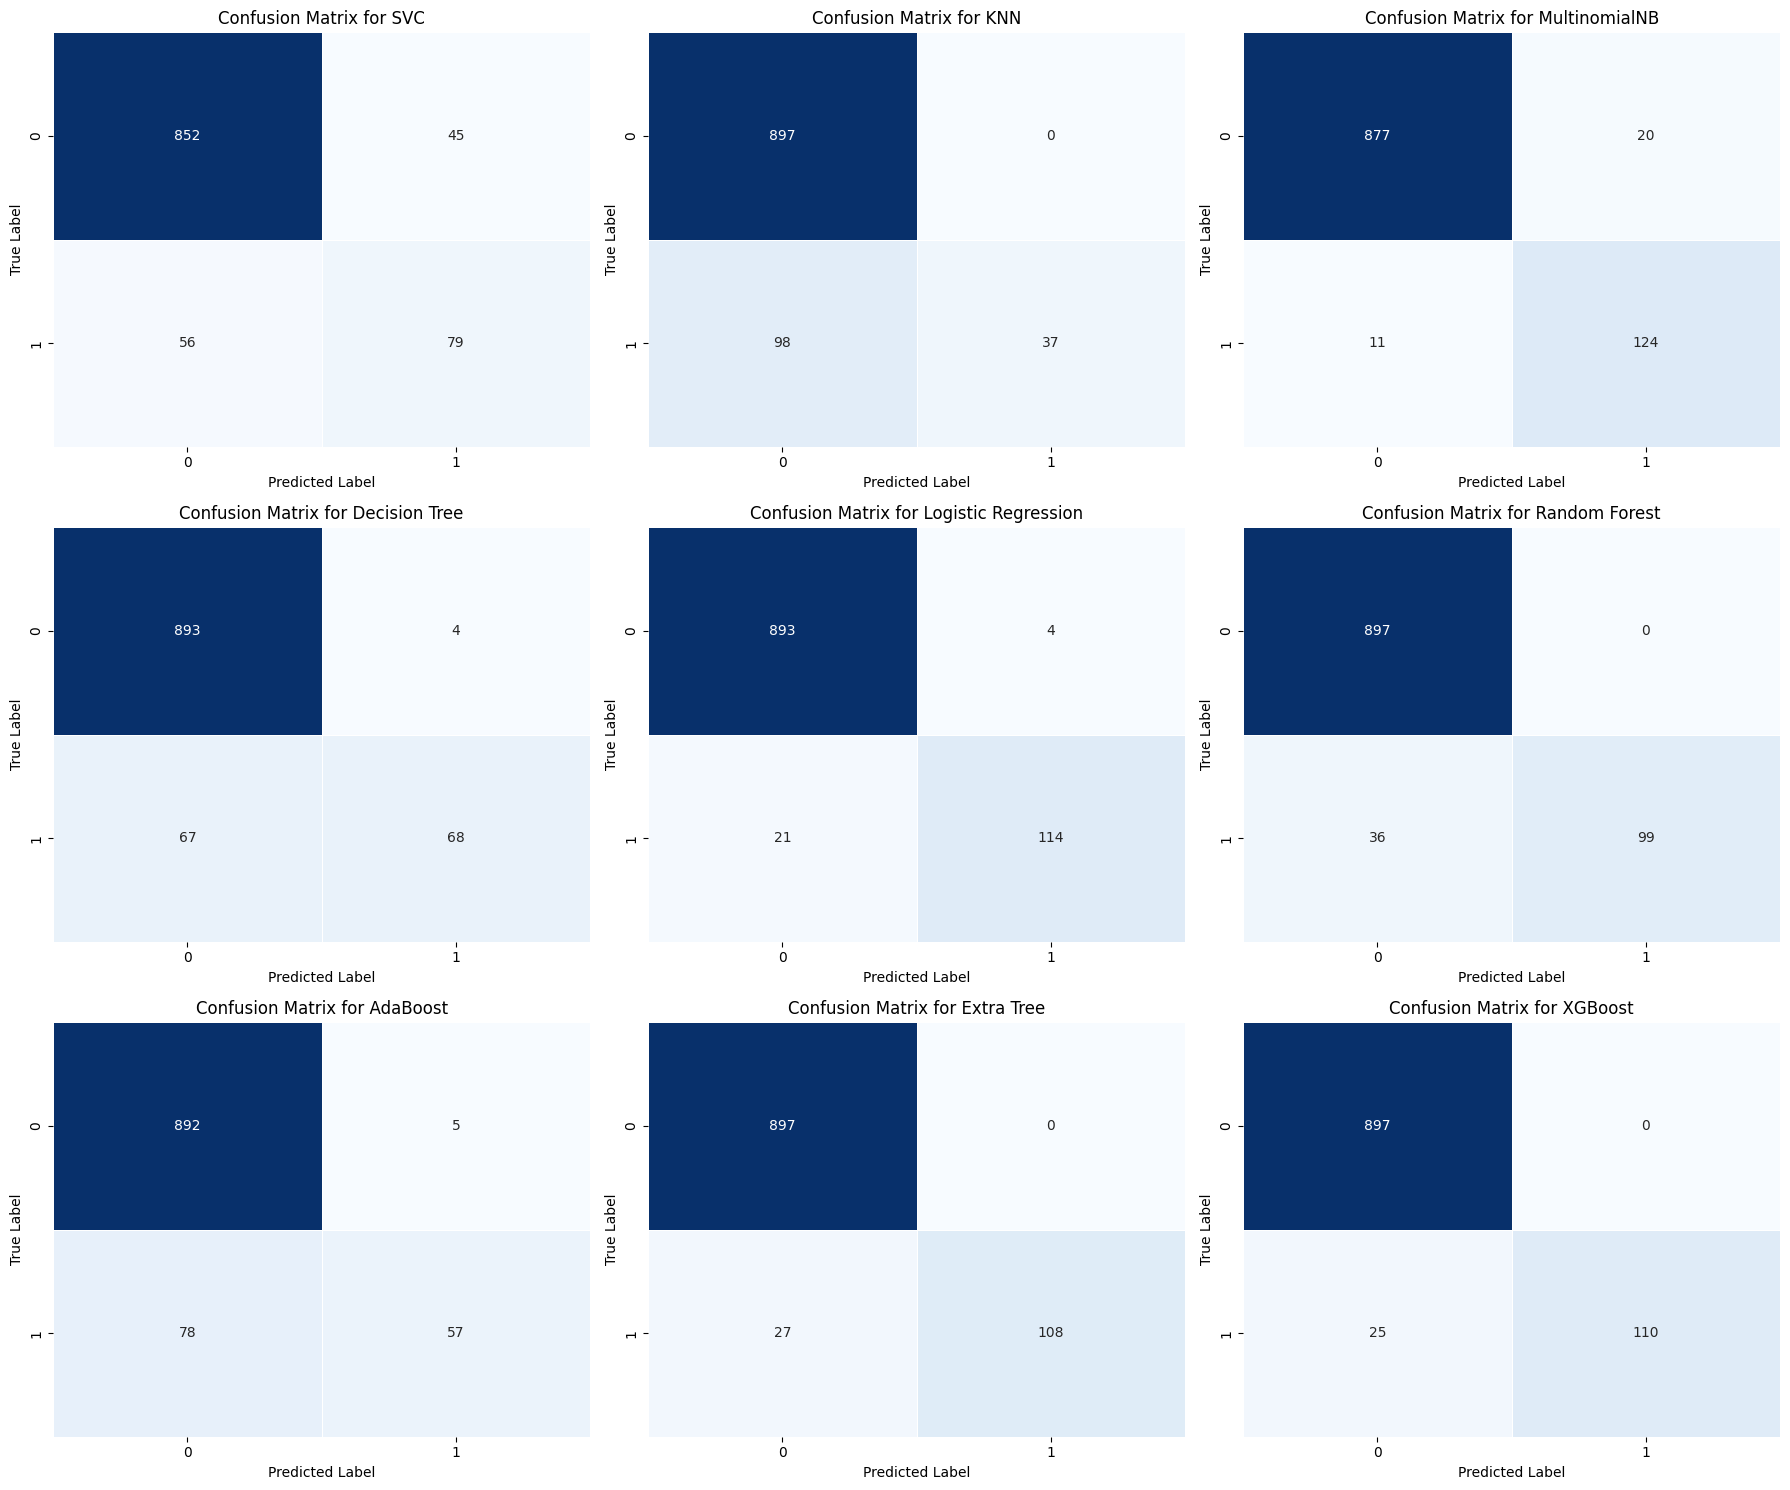

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the confusion matrices and model names
confusion_matrices = [
    (confusion_SVC, 'SVC'),
    (confusion_KNN, 'KNN'),
    (confusion_MNB, 'MultinomialNB'),
    (confusion_DTC, 'Decision Tree'),
    (confusion_LR, 'Logistic Regression'),
    (confusion_RF, 'Random Forest'),
    (confusion_ADC, 'AdaBoost'),
    (confusion_ETC, 'Extra Tree'),
    (confusion_XGB, 'XGBoost')
]

# Determine the number of rows and columns for subplots
n_models = len(confusion_matrices)
n_cols = 3  # You can adjust the number of columns as needed
n_rows = (n_models + n_cols - 1) // n_cols

# Create a figure and subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 5))
axes = axes.flatten() # Flatten the 2D array of axes for easier iteration

# Plot confusion matrices in subplots
for i, (conf_matrix, model_name) in enumerate(confusion_matrices):
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[i], linewidths=.5, edgecolors='black') # Added linewidths and edgecolors
    axes[i].set_title(f'Confusion Matrix for {model_name}')
    axes[i].set_xlabel('Predicted Label')
    axes[i].set_ylabel('True Label')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Predictions

In [85]:
df_train.head()

,Category,Message,text_word_token,stem_msg
0,ham,go jurong point crazy available bugis n great ...,"[go, jurong, point, crazy, available, bugis, n...",go jurong point crazi avail bugi n great world...
1,ham,ok lar joking wif You oni,"[ok, lar, joking, wif, You, oni]",ok lar joke wif you oni
2,spam,free entry 2 wkly comp win fa cup final tkts 2...,"[free, entry, 2, wkly, comp, win, fa, cup, fin...",free entri 2 wkli comp win fa cup final tkt 21...
3,ham,You dun say early hor You c already say,"[You, dun, say, early, hor, You, c, already, say]",you dun say earli hor you c alreadi say
4,ham,nah dont think goes usf lives around though,"[nah, dont, think, goes, usf, lives, around, t...",nah dont think goe usf live around though


In [86]:
df_train['stem_msg'][2]

'free entri 2 wkli comp win fa cup final tkt 21st may 2005 text fa 87121 receiv entri questionstd txt ratetc appli 08452810075over18'

In [87]:
# Predict Messgae
ham_messages = [
    "Hi there! How are you doing?",
    "Just wanted to check in and see how your day is going.",
    "Hope everything is going well with you.",
    "Did you have a chance to review the document I sent earlier?",
    "Looking forward to hearing from you soon.",
    "I'll be in the office until 5 PM today.",
    "Let me know if you need anything else from me.",
    "Thanks for your help with the project!",
    "Don't forget about the meeting tomorrow morning at 9 AM.",
    "Hope you had a great weekend!",
    "Here are the notes from our last discussion for your reference.",
    "Just a reminder to submit your report by the end of the day.",
    "Congratulations on your recent promotion!",
    "Let's catch up over coffee sometime this week.",
    "Wishing you a fantastic day ahead!",
    "Thanks for reaching out. I'll get back to you as soon as possible.",
    "Could you please provide an update on the status of the project?",
    "Hope you're enjoying the nice weather today.",
    "Looking forward to our team lunch tomorrow.",
    "I've attached the file you requested to this email.",
    "Let me know if you have any questions about the upcoming presentation.",
    "Hope you had a relaxing weekend!",
    "Just wanted to remind you about the deadline for the proposal submission.",
    "Thanks for your attention to this matter.",
    "I appreciate your help with this task.",
    "Let's discuss the details of the project during our meeting tomorrow.",
    "Hope your day is going smoothly.",
    "I'll be out of the office for the rest of the day. Please reach out if you need anything.",
    "Could you please review and provide feedback on the draft document?",
    "Looking forward to seeing you at the conference next week.",
    "Thanks for your quick response!",
    "Let's plan to meet next Tuesday to finalize the budget.",
    "Hope you had a productive day!",
    "Just a friendly reminder about our weekly team meeting tomorrow.",
    "Thanks for your cooperation on this project.",
    "Hope you're having a great start to the week.",
    "Please let me know if you need any further clarification on the instructions.",
    "Looking forward to the training session later today.",
    "Thanks for your patience while we work through this issue.",
    "Hope you're feeling better soon!",
    "Just wanted to touch base regarding the progress of the project.",
    "Let me know if you need any assistance with the presentation slides.",
    "Hope you had a wonderful holiday season!",
    "Thanks for your understanding and cooperation.",
    "Please review the attached document and let me know your thoughts.",
    "Looking forward to the upcoming team building event.",
    "Hope your day is going well so far.",
    "Just wanted to say thank you for your hard work on this project.",
    "I'll follow up with you next week to discuss the action items.",
    "Thanks for your input during the brainstorming session.",
    "Hope you're having a relaxing evening!",
    "Please find the requested information attached to this email.",
    "Looking forward to working with you on this project.",
]

# Preprocess Text
preprocessed_messages = []
for msg in ham_messages:
    # Lower case
    msg = msg.lower()
    # Remove punctuation
    msg = msg.translate(str.maketrans('', '', string.punctuation))
    # Remove stopwords
    msg = ' '.join([word for word in msg.split() if word not in stopwords.words('english')])
    preprocessed_messages.append(msg)

# Vectorize the preprocessed messages using the same vectorizer used during training
X_input = cv.transform(preprocessed_messages).toarray()

# Predict the class label for the vectorized text messages
predicted_labels = xgb.predict(X_input)

# Print the predicted label for each message
for idx, msg in enumerate(preprocessed_messages):
    if predicted_labels[idx] == 0:
        print(f"Message: '{msg}' - Predicted Label: Ham")
    else:
        print(f"Message: '{msg}' - Predicted Label: Spam")

Message: 'hi' - Predicted Label: Ham
Message: 'wanted check see day going' - Predicted Label: Ham
Message: 'hope everything going well' - Predicted Label: Ham
Message: 'chance review document sent earlier' - Predicted Label: Ham
Message: 'looking forward hearing soon' - Predicted Label: Ham
Message: 'ill office 5 pm today' - Predicted Label: Ham
Message: 'let know need anything else' - Predicted Label: Ham
Message: 'thanks help project' - Predicted Label: Ham
Message: 'dont forget meeting tomorrow morning 9' - Predicted Label: Ham
Message: 'hope great weekend' - Predicted Label: Ham
Message: 'notes last discussion reference' - Predicted Label: Ham
Message: 'reminder submit report end day' - Predicted Label: Ham
Message: 'congratulations recent promotion' - Predicted Label: Ham
Message: 'lets catch coffee sometime week' - Predicted Label: Ham
Message: 'wishing fantastic day ahead' - Predicted Label: Ham
Message: 'thanks reaching ill get back soon possible' - Predicted Label: Ham
Message